# IMPORTING THE PRIMARY LIBRARIES

In [392]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import missingno as msno #library used for visualizing the missing values in the dataset.
import warnings
warnings.filterwarnings('ignore')

### Since this project is based on sales and services, w will check on Hypotheses 

* Store Level
* Product Level
* Customer Level

### Store Level
- Size of the Store
- Age of the Store
- Location of the Store
- Population Density around the Store
- Marketing
- People Management

### Product Level
- Brand of the product
- Display Quality
- Packaging
- Advertising
- Environment

### Customer Level
- Buying capacity
- Lifestyle
- Size of Family
- Purchasing History

# LOADING THE DATASET

In [393]:
train = pd.read_csv('bigdatamart_train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [394]:
test = pd.read_csv('bigdatamart_test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [395]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### In the train dataset we have 
* 4 - Float
* 1 - Integer
* 7 - Object

In [396]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


#### in the test dataset we have
* 3 - Float
* 1 - Integer
* 7 - Object

In [397]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [398]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4705.0,12.695633,4.664849,4.555,8.645000,12.500000,16.700000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


In [399]:
### Now that we have two set of dataset, let combine both 

In [400]:
train.isnull().sum().sort_values(ascending=True)

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight                  1463
Outlet_Size                  2410
dtype: int64

### Since, this is a sales dataset definitely we can find duplications which we are going to find in the below set of codes.

In [401]:
idsTotal = train.shape[0]
idsDupli = train[train['Item_Identifier'].duplicated()]

In [402]:
print(f'There are {len(idsDupli)} duplicate IDs for {idsTotal} total entries')

There are 6964 duplicate IDs for 8523 total entries


As we noticed we have duplications, due to the same product exist in more than one store.   

### Since, we have two dataset lets combine each of them by specifying where each observations belong, so that we don't have to repeat preprocessing separately.

In [403]:
train['source'] = 'train'
test['source'] = 'test'
df = pd.concat([train, test], ignore_index=True)
df.shape

(14204, 13)

In [404]:
df.head() # we can observe which source these details belongs to i.e refer last column

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [405]:
df.tail() # we can observe which source these details belongs to i.e refer last column

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


### Let's check for the missing values

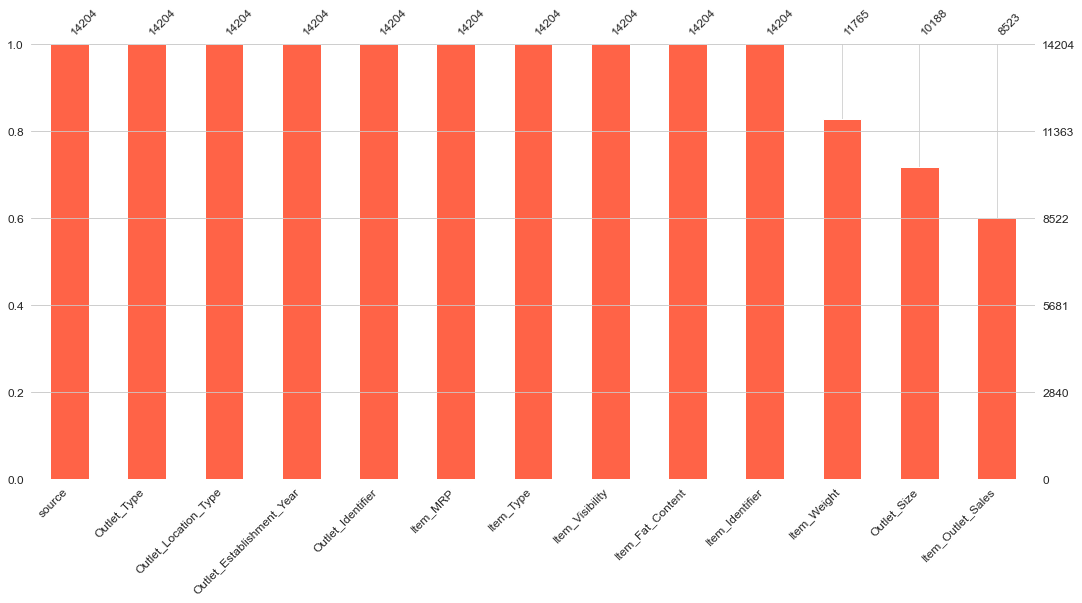

In [406]:
msno.bar(df, color='tomato', figsize=(18,8), fontsize=12, sort='descending')
plt.show()

#### Here, we have missing values in
* Item_Weight = 2439
* Outlet_Size * 4016
* Item_Outlet_Sale = 5681 ## missing values present because test data do not have this column.

## Exploratory Data Analysis (EDA)

###### Checking on the distribution of the variable in train Dataset:

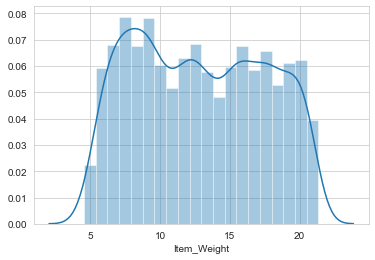

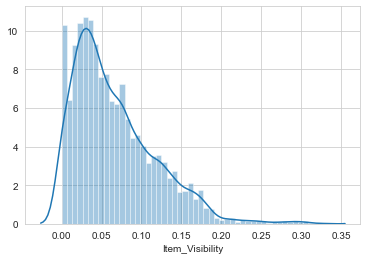

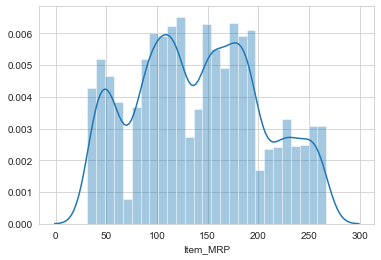

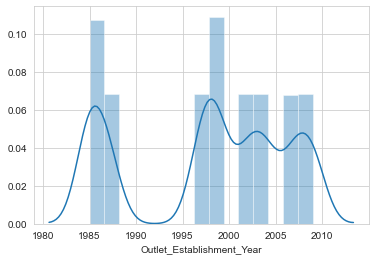

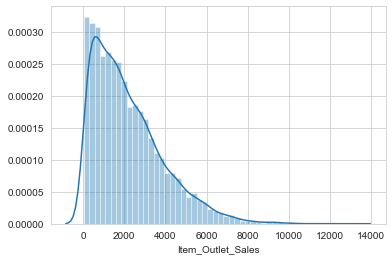

In [407]:
for i in train.describe().columns:
    sns.distplot(train[i].dropna())
    plt.show()

#### Observation
* Item_visibility is rightly skewed: reason might be like not all the products would be kept or displayed infront of customer eyes, it needs to be picked by going there.
* Item_Outlet_Sales is also righly skewed: reason migh be same demand intensity will not be there for all the products accross all the stores.
* Others do have fair distribution which doesn't need any kind of treatment.

In [408]:
train['Item_Outlet_Sales'] = np.sqrt(train['Item_Outlet_Sales'])

##### Checking for the outliers in train dataset.

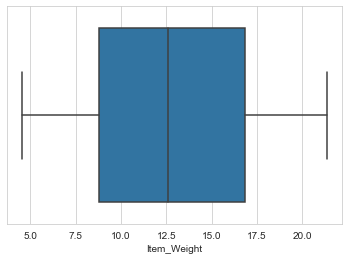

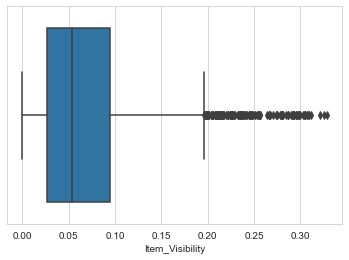

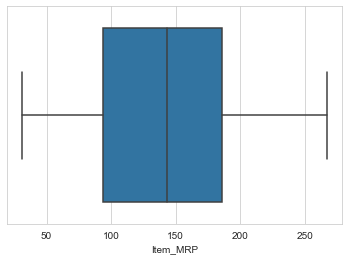

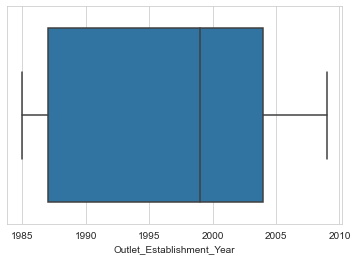

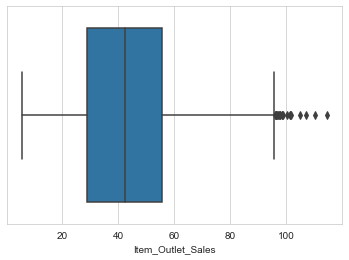

In [409]:
for i in train.describe().columns:
    sns.boxplot(train[i].dropna())
    plt.show()

#### Observation
* As we noticed in the distribution, its clear that we have outliers present in 'Item_Visibility' & 'Item_Outlet_Sales' columns which needs to be treated before heading for the model building.

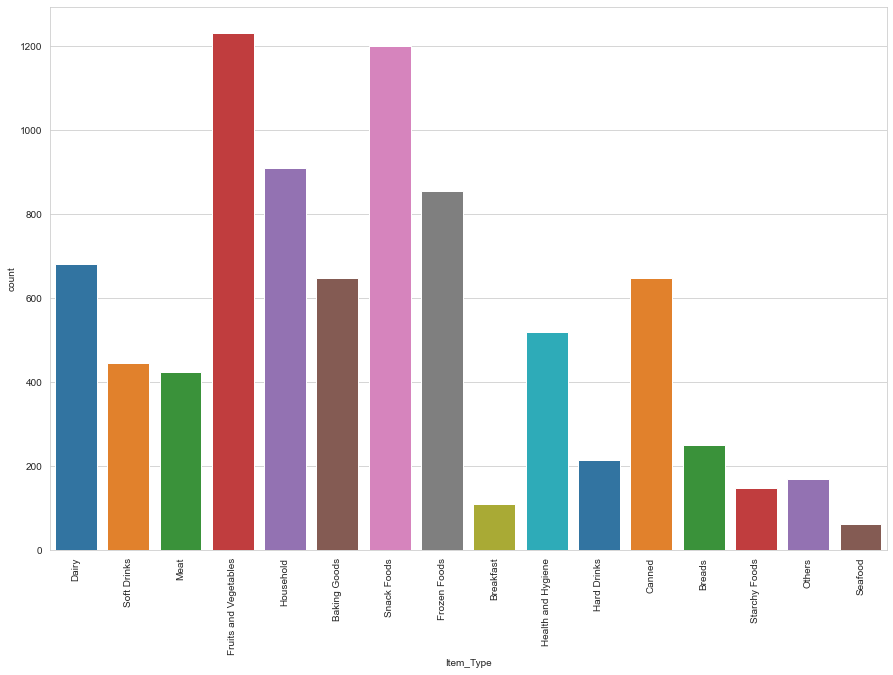

In [410]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(train.Item_Type,palette='tab10')
plt.xticks(rotation=90)
plt.show()

In [411]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

### Observation
* with the above plot we can observe that the most of the customer comes to buy Fruits&Vegetables and Snack Foods which couts 1232 and 1200 respectively. Follwed by we have Household and Forzen Foods has the highest counts.
* Starchy Foord, Breakfast, Seafood are the least bought items in the list.

### Now Let's check the distribution of Outlet_Size

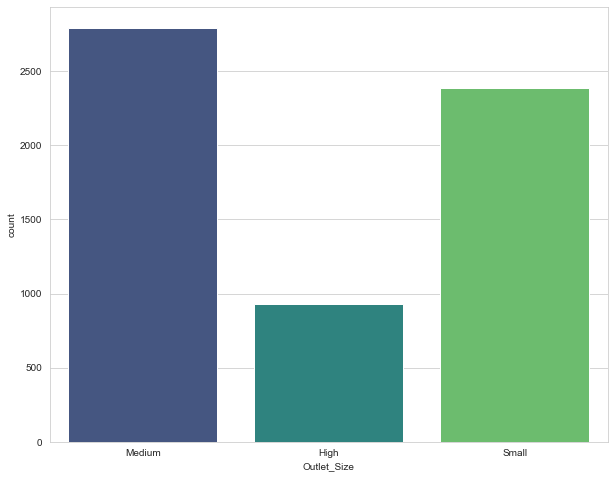

In [412]:
plt.figure(figsize=(10,8))
sns.countplot(train.Outlet_Size,palette='viridis')
plt.show()

In [413]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

#### Observation
* Less number of stores in 'High Outlet_Size' category may be they are headquarters or prime stores. Let's see how this variable relates to our target.

### Now Let's check the distribution of Outlet_Location_Type

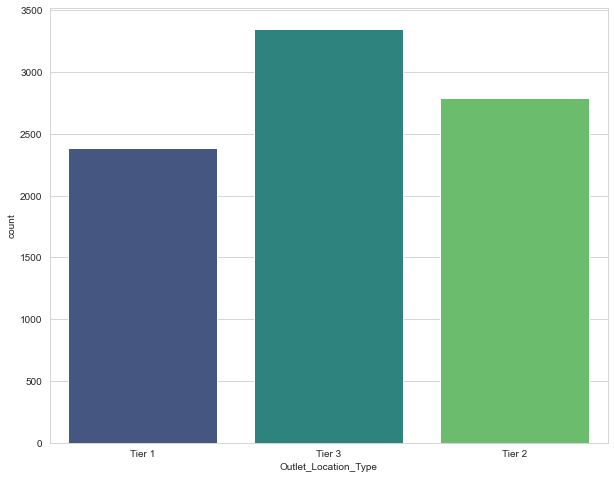

In [414]:
plt.figure(figsize=(10,8))
sns.countplot(train.Outlet_Location_Type, palette='viridis')
plt.show()

In [415]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

#### Observation
* Tier 3 and 2 has higher number outlets compared to densely populated area.

### Now Let's check the distribution of Outlet_Type

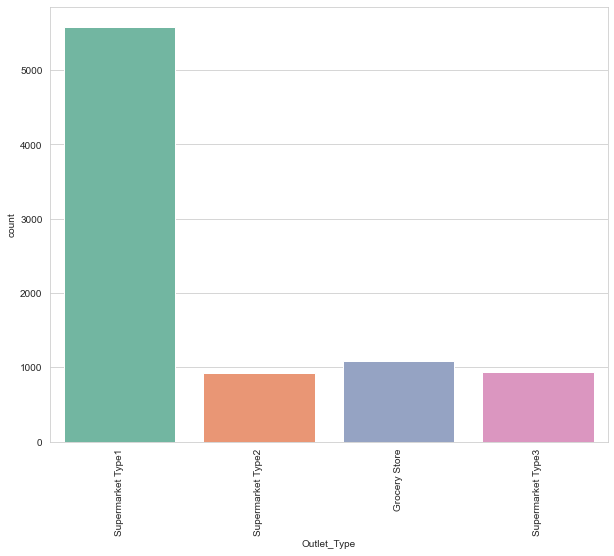

In [416]:
plt.figure(figsize=(10,8))
sns.countplot(train.Outlet_Type,palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [417]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

#### Observation
* It shows that apart from Supermart Type1 rest all have low number of stores, we can also create a single category with all these category. 

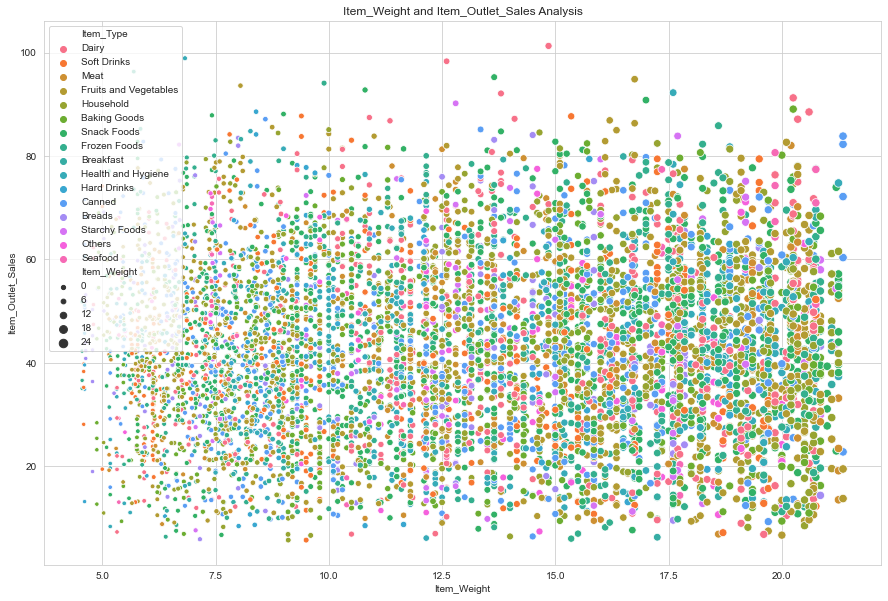

In [418]:
plt.figure(figsize=(15,10))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=train)
plt.show()

#### Observation
* We are trying check for the relationship between Item_Weight and Item_Outlet_Sales
* Item_Weight doesn’t look like it will be a very helpful variable anyway.

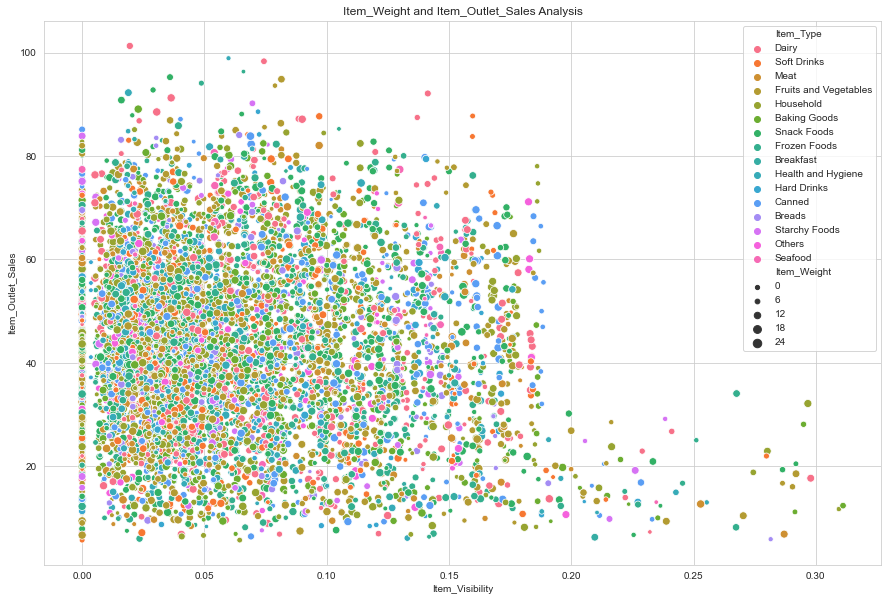

In [419]:
plt.figure(figsize=(15,10))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=train)
plt.show()

#### Observation
* Wow!, that's very interesting to see that the most of the items are high in sales even thought the visibility is very low.
* At the same time, we can notice here is that the high visibility productes have less sales. example. people would not purchase clothes as much they purchase food items.

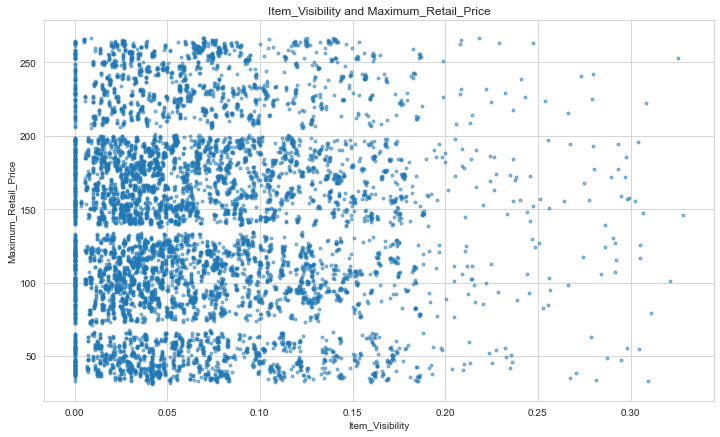

In [420]:
plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum_Retail_Price')
plt.title('Item_Visibility and Maximum_Retail_Price')
plt.plot(train.Item_Visibility, train.Item_MRP,'.',alpha=0.5)
plt.show()

#### Observation
* Here also, we can observe that the the majority of Retail_Price have lower visibility. 
* with the above observations, we understood that the visibility doesn't impact much on the sales.

In [421]:
OTP = train.pivot_table(index='Outlet_Type', values='Item_Outlet_Sales', aggfunc=np.median)
OTP

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,16.031182
Supermarket Type1,44.617732
Supermarket Type2,40.683885
Supermarket Type3,58.008217


### Now let's understand the impact of Outlet_Types on Sales

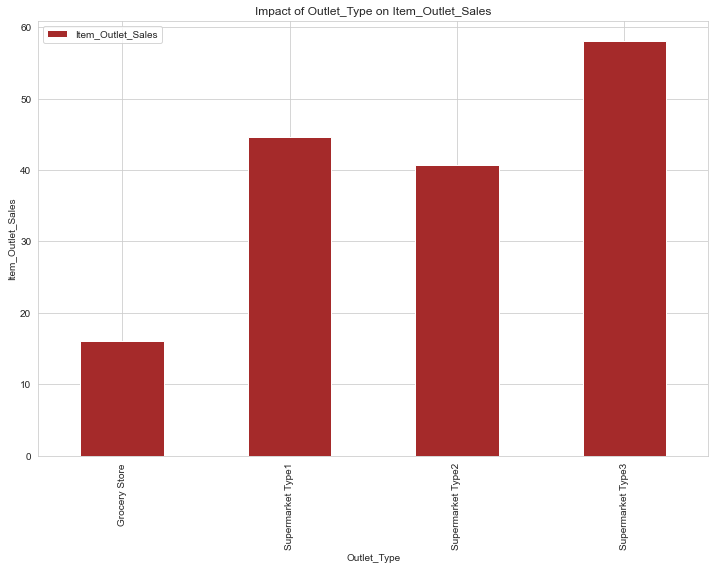

In [422]:
OTP.plot(kind='bar',color='brown',figsize=(12,8))
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Type on Item_Outlet_Sales')
plt.xticks(rotation=90)
plt.show()

#### Observation
* Here we can see that outlet type has a major impact on the sale. But even more clear is that the gatp between grocery stores and Supermarkets

### Now let's understand the impact of Item_Fat on Sales

In [423]:
IFP = train.pivot_table(index='Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.median)
IFP

,Item_Outlet_Sales
Item_Fat_Content,
LF,42.398716
Low Fat,42.020252
Regular,42.960419
low fat,40.177471
reg,38.635781


Oops! here we have the same set of values distributed in different names. lets, replace the values according the category.

In [424]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [425]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [426]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [427]:
IFP = train.pivot_table(index='Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.median)
IFP

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,42.012329
Regular,42.948794


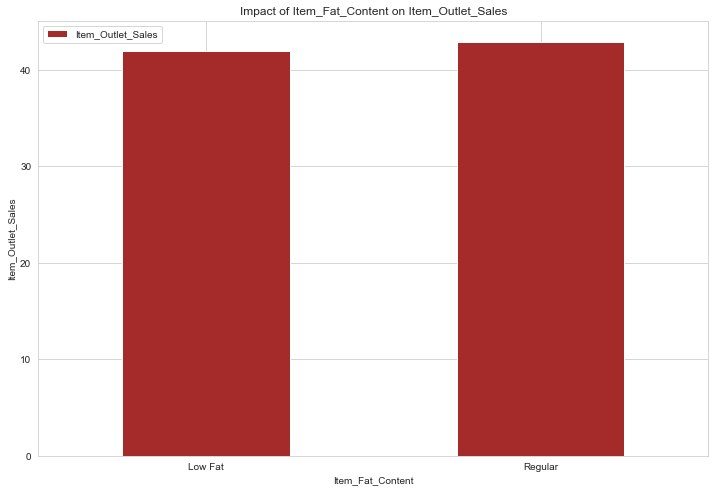

In [428]:
IFP.plot(kind='bar',color='brown',figsize=(12,8))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_Fat_Content on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

## Correllation

In [429]:
corr=train.corr()
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.563434
Item_Weight                  0.013037
Outlet_Establishment_Year    0.007511
Item_Visibility             -0.161541
Name: Item_Outlet_Sales, dtype: float64

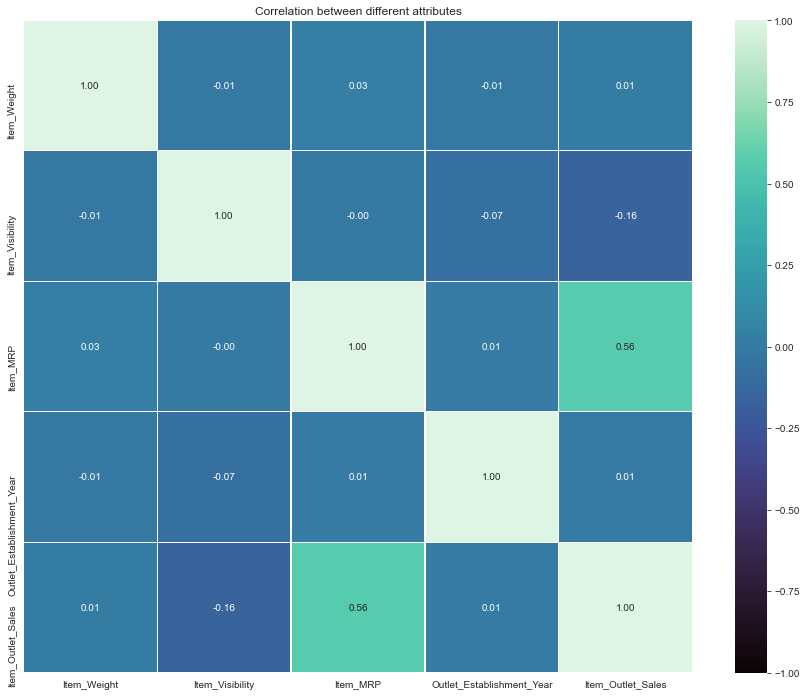

In [430]:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(),annot=True,linewidths=0.1,linecolor='white',fmt='0.2f',vmin=-1,cmap='mako')
plt.title('Correlation between different attributes')
plt.show()

#### Observation
* During correlation, its clear that the feature Item_MRP is highly correlated with the target variable.

## Feature Engineering and Transformation

### Treating the Missing Values

### Item_Weight

In [431]:
df['Item_Weight'].mean()

12.792854228644991

In [432]:
''' Since Item_Weight colums doesnt have outlier and skewness we are replacing missing values with mean value'''
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

### Outlet_Size

In [433]:
''' We will be replacing the missing values in this colums with medium '''
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [434]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [435]:
df.isnull().sum() ## now we dont have any null values

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

### Item_Visibility

""" The Item_Visibility had the minimum value 0 which is not possible. Hence, we are treating this as a missing value and replacing with the median valum."""

In [436]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [437]:
df['Item_Visibility']=df['Item_Visibility'].replace(0,df['Item_Visibility'].median())

### Item_Type

In [438]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

#### The items type are either Food,Drinks or Non Consumables.

In [439]:
pd.set_option('display.max_rows',None)

In [440]:
df['Item_Identifier'].value_counts()

FDM56    10
NCH18    10
FDL14    10
NCJ06    10
FDY09    10
FDE36    10
FDF22    10
NCV42    10
FDM60    10
NCC06    10
NCO30    10
FDU15    10
FDZ07    10
NCK05    10
NCN43    10
FDD46    10
NCM05    10
FDE45    10
FDX36    10
FDL09    10
FDW56    10
FDQ14    10
NCV54    10
FDU38    10
FDH08    10
FDD47    10
FDF20    10
FDP21    10
FDQ08    10
NCI54    10
FDT04    10
FDO36    10
DRM37    10
FDS15    10
DRD24    10
DRF01    10
FDI53    10
FDZ28    10
FDL46    10
NCW42    10
FDH57    10
FDB58    10
FDU28    10
NCX05    10
DRI11    10
NCO14    10
FDQ45    10
DRD25    10
FDU20    10
FDP37    10
FDA32    10
FDS45    10
FDY39    10
FDS21    10
FDE34    10
FDQ37    10
FDB41    10
FDR07    10
NCX18    10
FDQ47    10
FDS03    10
FDR27    10
FDH56    10
FDE24    10
FDK56    10
FDK33    10
FDE21    10
FDM34    10
FDC53    10
FDF16    10
NCB18    10
NCS41    10
FDA52    10
NCK53    10
FDS01    10
FDZ20    10
NCZ30    10
NCP55    10
NCJ18    10
FDU48    10
FDR09    10
DRB25    10
FDX43    10
FDN3

In order to do a better analysis, we will create 3 category

In [441]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['New_Item_Type'].value_counts()

FD    10201
NC     2686
DR     1317
Name: New_Item_Type, dtype: int64

In [442]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [443]:
df['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

Now here we need to check one more feature i.e. Fat_content vs non consumable ... 

In [444]:
# lets mark non-consumable as seperate category in low fat:
df.loc[df['New_Item_Type']=='Non-Consumable','Item_Fat_Content'] = 'Non_Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non_Edible    2686
Name: Item_Fat_Content, dtype: int64

## Dealing with Categorical Variables

### Label Encoder

We will convert all the categorical variables into numeric types (0 or 1).

In [445]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#Since Outlet_Identifier is not categorical we create new variable
df['outlet'] = label.fit_transform(df['Outlet_Identifier'])

In [446]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_Type,outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,9
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,9
3,FDX07,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food,0
4,NCD19,8.93,Non_Edible,0.054021,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,1


In [447]:
variable = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_Type','Outlet_Type','outlet']
for i in variable:
    df[i] = label.fit_transform(df[i])

In [448]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_Type,outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,1,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,1,9
3,FDX07,19.20,2,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,1,0
4,NCD19,8.93,1,0.054021,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,2,1


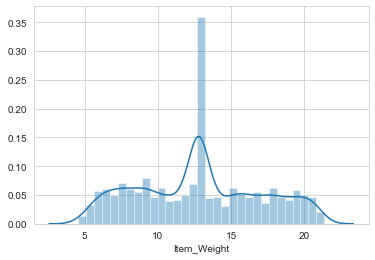

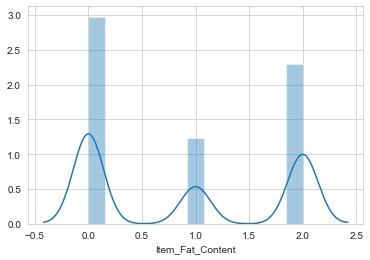

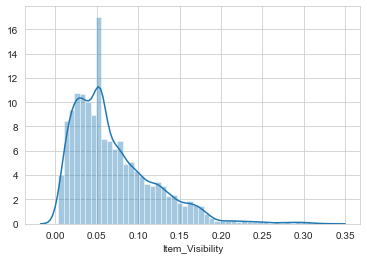

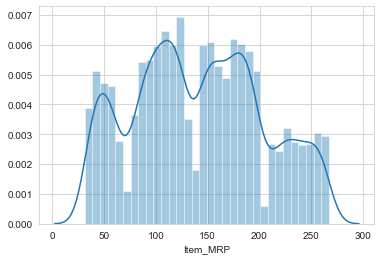

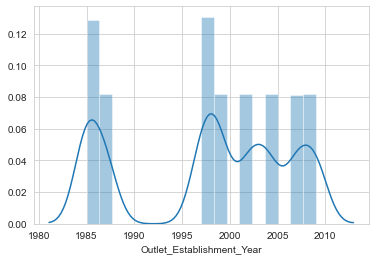

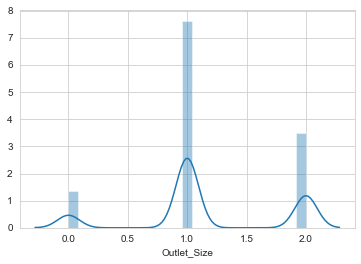

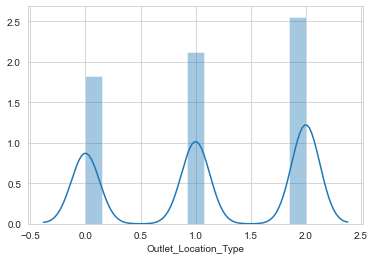

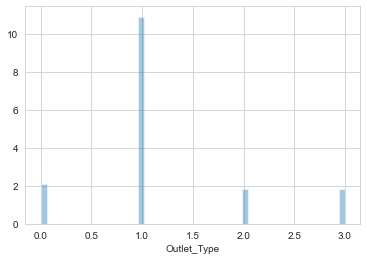

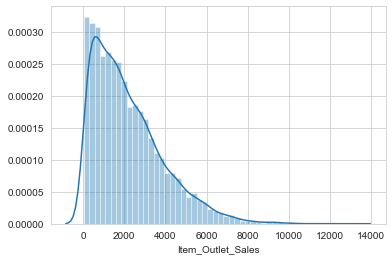

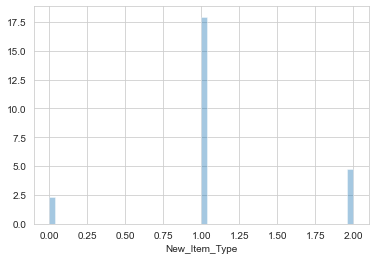

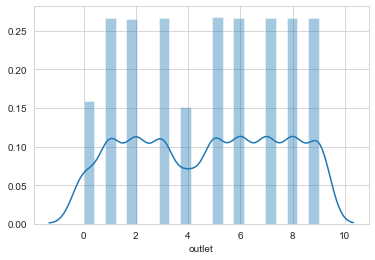

In [450]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

In [451]:
#We have found the skewness in the below columns which are treated with square root transformation
df['Item_Visibility'] = np.sqrt(df['Item_Visibility'])
df['Item_Outlet_Sales'] = np.sqrt(df['Item_Outlet_Sales'])

# MODEL BUILDING

In [452]:
df.drop('Item_Type',axis=1,inplace=True)

In [453]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [454]:
train.drop(['source'],axis=1,inplace=True)

In [455]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [456]:
x_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train = train['Item_Outlet_Sales']
x_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

## LinearRegression

In [457]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [458]:
lr_pred = lr.predict(x_test)

In [459]:
lr_pred

array([45.44270408, 32.97823905, 39.68919609, ..., 40.81685304,
       53.75311891, 34.30838991])

In [460]:
lr_accuracy = round(lr.score(x_train,y_train)*100)
lr_accuracy

57

## DecisionTreeRegression

In [461]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
tree.fit(x_train,y_train)
tree_pred = tree.predict(x_test)

In [462]:
tree_pred

array([38.27172602, 34.4925802 , 23.3128269 , ..., 40.0685341 ,
       60.79079311, 36.80568299])

In [463]:
tree_accuracy = round(tree.score(x_train,y_train)*100)
tree_accuracy

69

## RandomForestRegressor

In [464]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_accuracy = round(rf.score(x_train,y_train)*100)
rf_accuracy

68

## XGBoost Regressor

In [465]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000,learning_rate=0.05)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [466]:
y_pred = model.predict(x_test)

In [467]:
model.score(x_train,y_train)*100

87.66873826223782

We have found that the XGBRegressor is giving 88% accuracy which could be considered as the best model for this problem.

# Saving the Model

In [ ]:
import pickle
filename = 'BigDataMart.pkl'
pickle.dump(model,open(filename,'wb'))